In [20]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
titanic = pd.read_csv("/content/drive/MyDrive/tested.csv")

<Axes: xlabel='Survived', ylabel='count'>

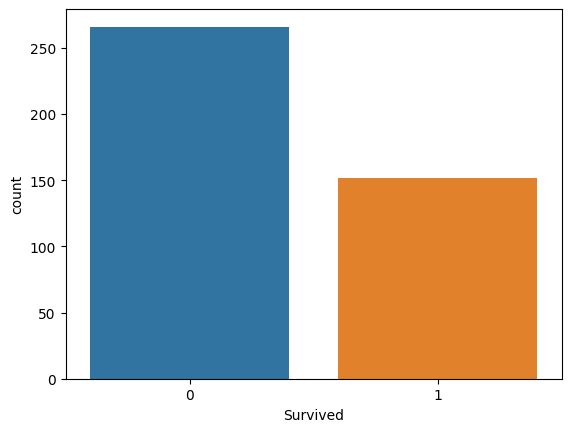

In [23]:
sns.countplot(x='Survived',data=titanic)

<ipython-input-24-15d0e97c9337>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(),cmap='RdBu')


<Axes: >

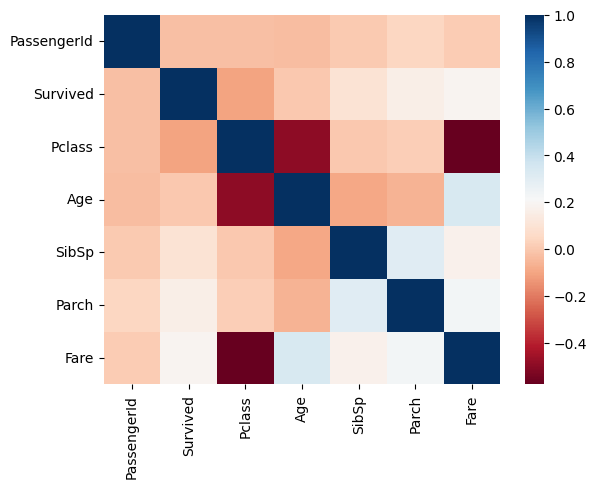

In [24]:
sns.heatmap(titanic.corr(),cmap='RdBu')

<Axes: xlabel='Survived', ylabel='count'>

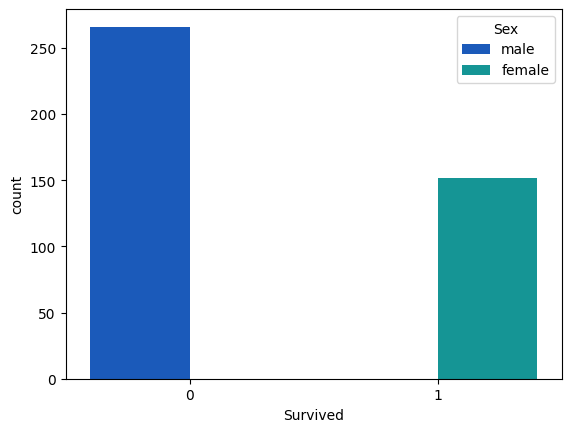

In [25]:
sns.countplot(x='Survived', hue='Sex', data = titanic, palette = 'winter')

In [26]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1 , inplace = True)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,male,NaN,0,0,8.0500
414,1,1,female,39.0,0,0,108.9000
415,0,3,male,38.5,0,0,7.2500
416,0,3,male,NaN,0,0,8.0500


In [27]:
titanic= titanic.fillna(method='ffill')

In [28]:
titanic.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [29]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
le = LabelEncoder()
titanic['Sex']= le.fit_transform(titanic['Sex'])
label_encoders['Sex'] = le
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,34.5,0,0,7.8292
1,1,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,1,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...,...
413,0,3,1,28.0,0,0,8.0500
414,1,1,0,39.0,0,0,108.9000
415,0,3,1,38.5,0,0,7.2500
416,0,3,1,38.5,0,0,8.0500


In [30]:
titanic1 = titanic.drop(['Survived'],axis=1)
titanic1

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,34.5,0,0,7.8292
1,3,0,47.0,1,0,7.0000
2,2,1,62.0,0,0,9.6875
3,3,1,27.0,0,0,8.6625
4,3,0,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,1,28.0,0,0,8.0500
414,1,0,39.0,0,0,108.9000
415,3,1,38.5,0,0,7.2500
416,3,1,38.5,0,0,8.0500


In [31]:
titanic2 = titanic['Survived']
titanic2

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(titanic1,titanic2, test_size = 0.333)

In [33]:
titanic2.describe()

count    418.000000
mean       0.363636
std        0.481622
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [34]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare
121,3,1,12.0,1,0,7.7500
211,3,1,32.0,0,0,7.0500
195,3,1,33.0,0,0,7.8542
33,3,0,33.0,1,2,23.4500
299,3,1,29.0,0,0,7.8542
...,...,...,...,...,...,...
189,2,1,40.0,0,0,13.0000
404,1,1,43.0,1,0,27.7208
39,3,1,25.0,0,0,56.4958
207,2,1,24.0,0,0,10.5000


In [35]:
y_train

121    0
211    0
195    0
33     1
299    0
      ..
189    0
404    0
39     0
207    0
73     0
Name: Survived, Length: 278, dtype: int64

In [36]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
model.predict(X_test)

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1])

In [38]:
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [39]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [40]:
LR.fit(X_train,y_train)

LogisticRegression()

In [41]:
prediction = LR.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test,prediction)

array([[93,  0],
       [ 0, 47]])

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

1.0